In [ ]:
# Load the data:
import pandas as pd
data = pd.read_csv("cereals.csv")
data = data[data.columns.drop("Manuf")]
data = data[data.columns.drop("Type")]
cereals = data.sample(n = 15, random_state = 5)
cereals

,Name,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Rating
25,Frosted_Flakes,110,1,0,200,1.0,14.0,11,25.0,25,31.435973
26,Frosted_Mini-Wheats,100,3,0,0,3.0,14.0,7,100.0,25,58.345141
10,Cap'n'Crunch,120,1,2,220,0.0,12.0,12,35.0,25,18.042851
34,Great_Grains_Pecan,120,3,3,75,3.0,13.0,4,100.0,25,45.811716
63,Shredded_Wheat_'n'Bran,90,3,0,0,4.0,19.0,0,140.0,0,74.472949
35,Honey_Graham_Ohs,120,1,2,220,1.0,12.0,11,45.0,25,21.871292
57,Raisin_Bran,120,3,1,210,5.0,14.0,12,240.0,25,39.259197
37,Honey-comb,110,1,0,180,0.0,14.0,11,35.0,25,28.742414
58,Raisin_Nut_Bran,100,3,2,140,2.5,10.5,8,140.0,25,39.703400
12,Cinnamon_Toast_Crunch,120,1,3,210,0.0,13.0,9,45.0,25,19.823573


In [ ]:
# Variables that are dissimilar:
from scipy.spatial.distance import pdist
ObservationData = cereals[['Calories', 'Protein', 'Fat', 'Sodium', 'Fiber', 'Carbo', 'Sugars', 'Potass', 'Vitamins']]
distance_matrix = pdist(ObservationData, 'euclidean')

In [ ]:
# Distance Matrix:
print(distance_matrix)
print(len(distance_matrix))

[213.89015873  24.69817807 146.34548165 233.25736859  30.13303835
 215.51566068  22.38302929 130.21712637  24.79919354 110.12265889
  60.03332408  65.03076195  88.23831367 152.47950682 230.3714392
  77.7431669   48.98979486 227.72132092 253.23901753 191.71332765
 145.66228064 218.06421073 120.97107092 159.26393189 154.88705562
 190.37069102 172.47898423 159.15087182 247.31963125  10.09950494
 205.32656915  41.34005322 133.61698994  14.52583905 131.26690367
  81.25269226  86.18004409  94.41398202 148.87578715  93.87225362
 155.27073131 194.67408662 124.18534535  79.0474541  145.90407808
  82.49848483 100.15488006  96.98453485 127.98046726 104.51315707
 243.18100255 236.21176939 211.22499852 143.06467069 234.08545448
 154.00649337 184.52913049 180.76504087 213.89483397 169.12421471
 195.32280973  42.53234064 125.86699329  10.34408043 132.78177586
  83.09031231  87.91473142  92.20629046 140.57738083 207.49939759
 123.83658587 195.11022526 250.84258012 226.39567134 227.9912279
 199.4667892

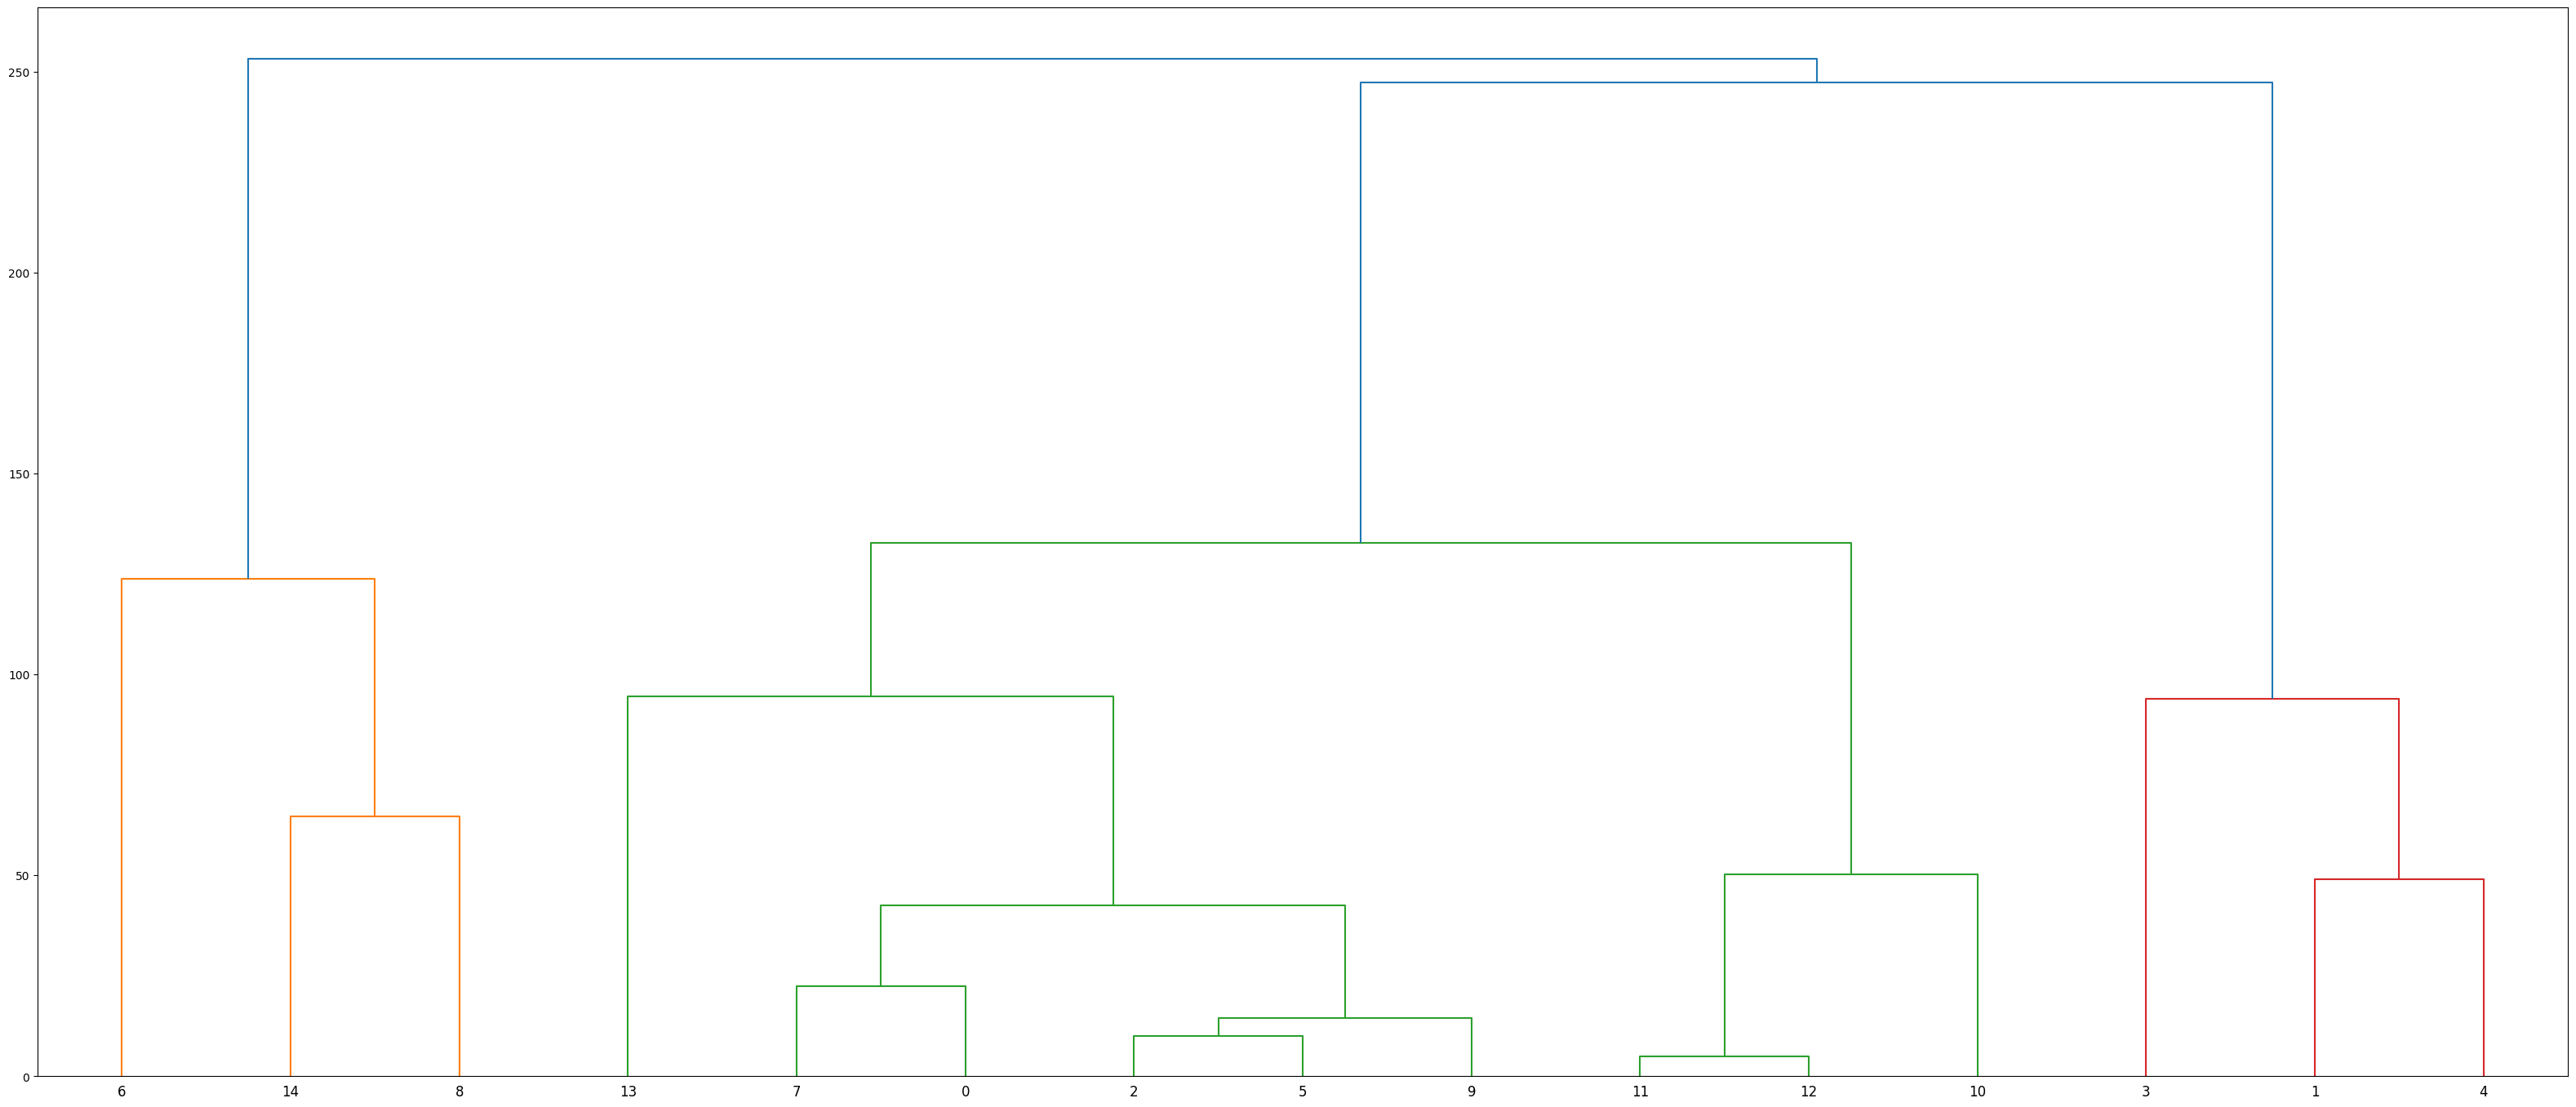

In [ ]:
# Model Specification:
from scipy.cluster import hierarchy
est = hierarchy.linkage(distance_matrix, method = 'complete', optimal_ordering = True)
dendrogram = hierarchy.dendrogram(est)

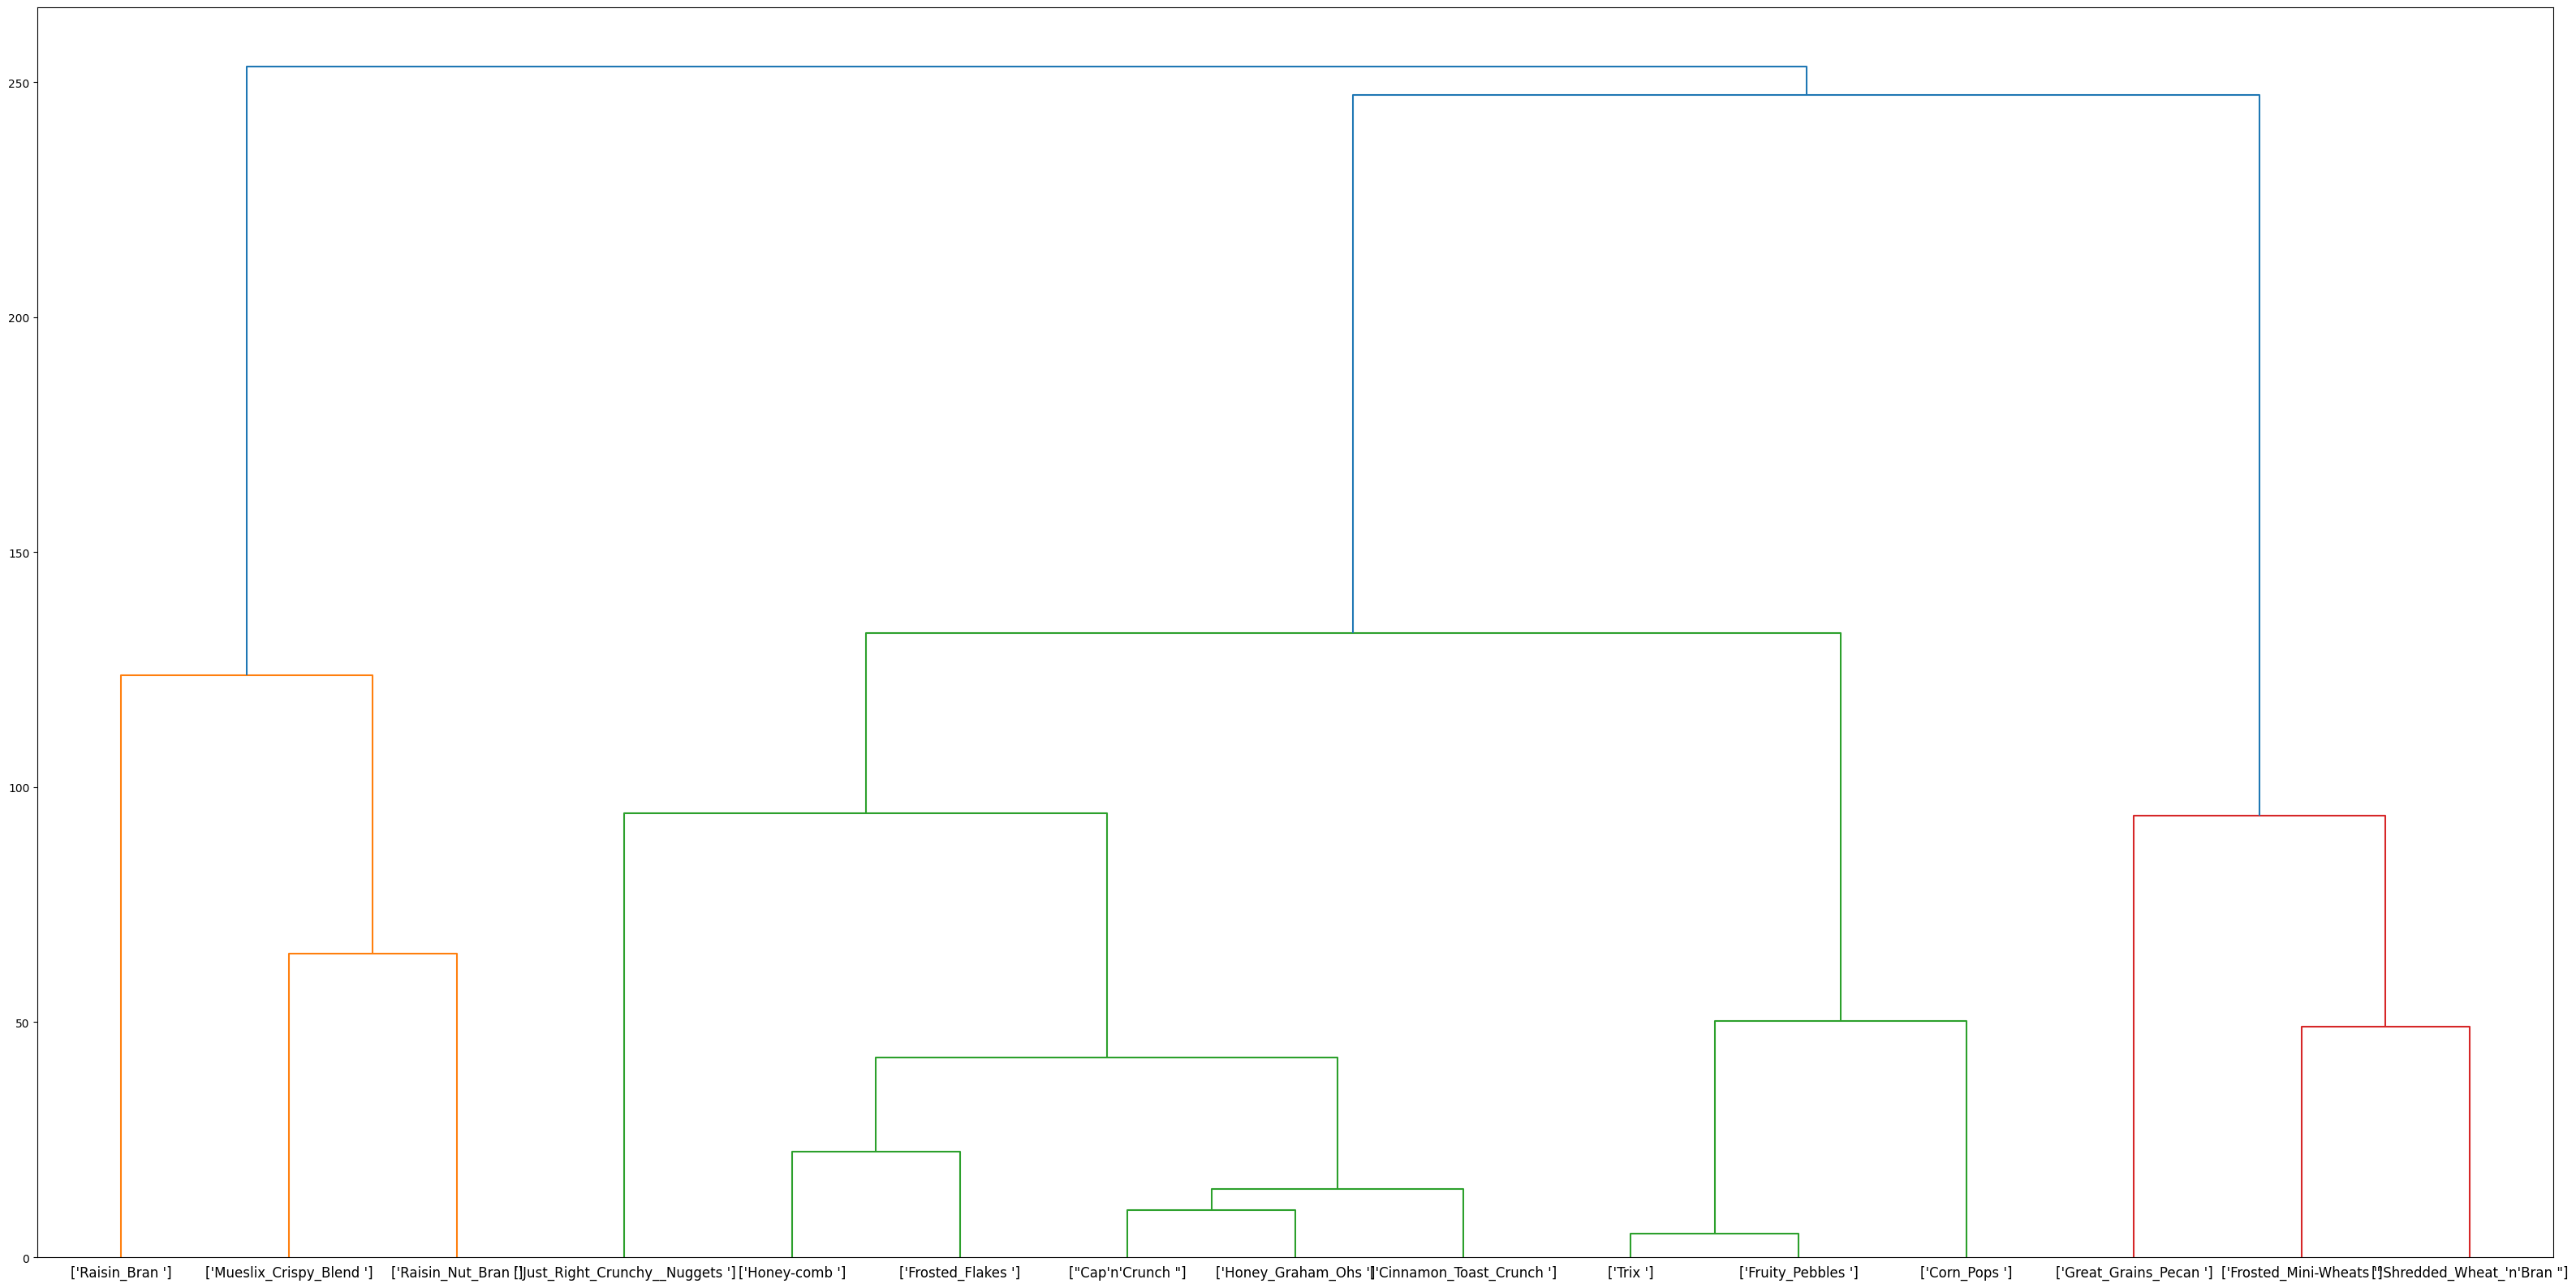

In [ ]:
# Labeling the dendrogram:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,20)
labels_array = cereals[["Name"]].to_numpy()
dendrogram = hierarchy.dendrogram(est, labels = labels_array)


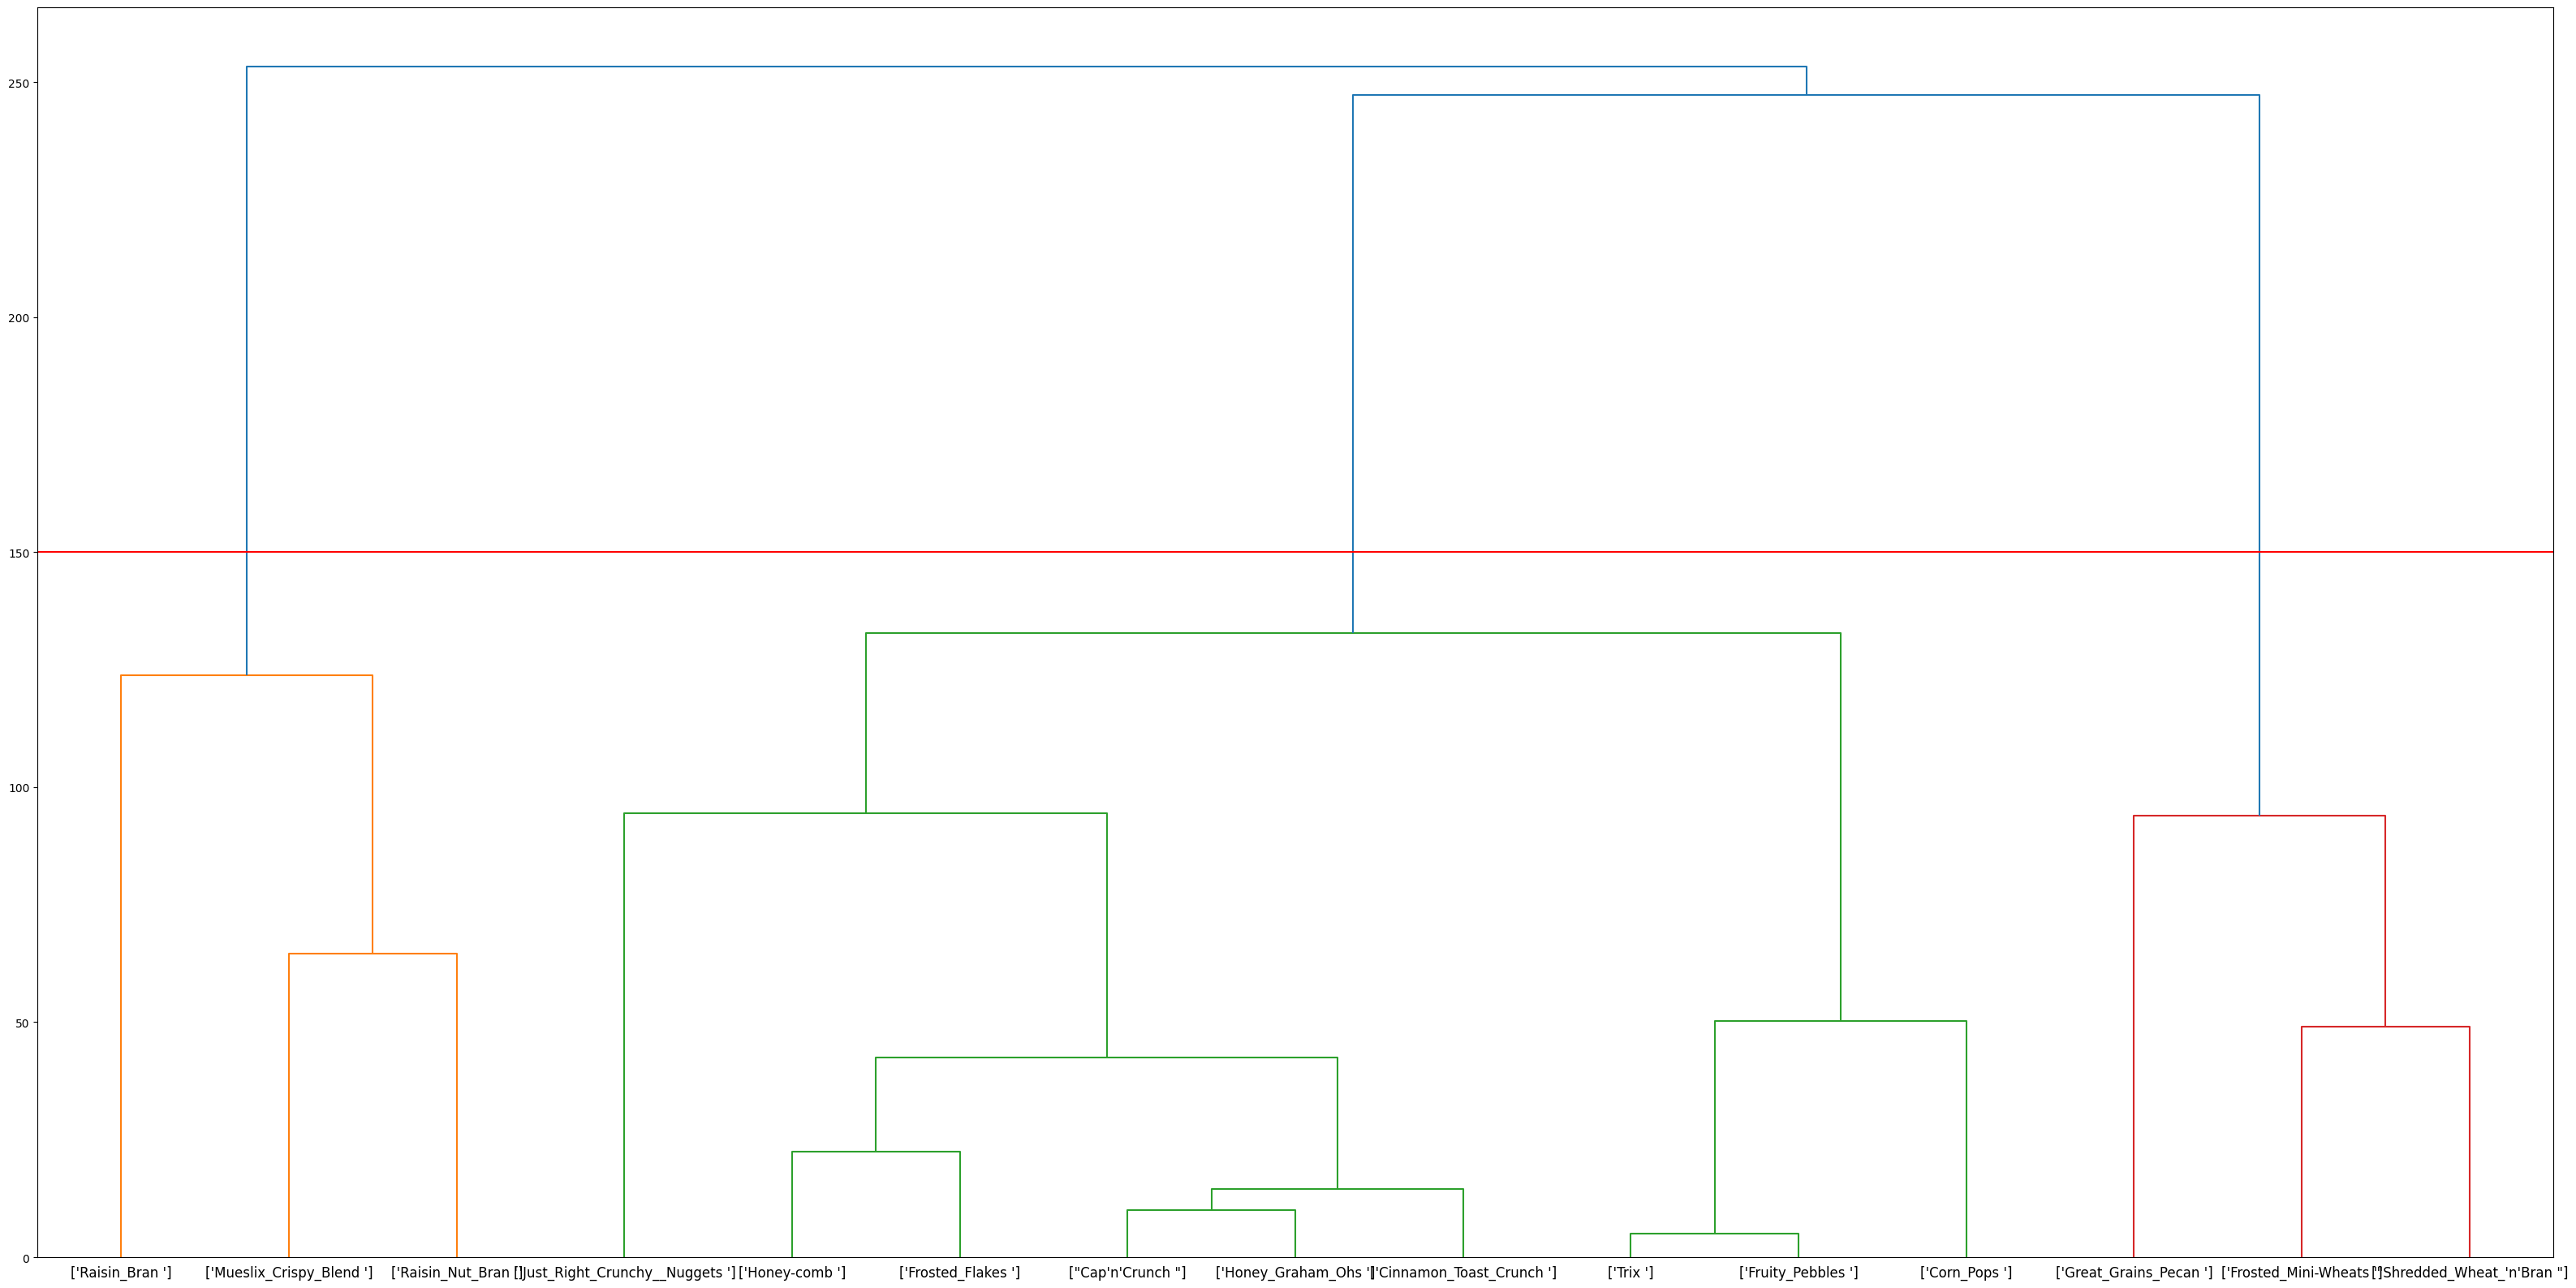

In [ ]:
# Model Estimation I:

dendrogram = hierarchy.dendrogram(est, labels = labels_array, color_threshold = 150)
plt.axhline(y=150, color='r')

In [ ]:
# Observations in Each Cluster:
cluster_labels = hierarchy.cut_tree(est, height = 150)
cereals['cluster'] = cluster_labels


for i in range(max(cereals['cluster']+1)):
  cluster_info = cereals[(cereals['cluster'] == i)]
  print('Cluster ' + str(i) + ':')
  print(cluster_info['Name'])
  print()

Cluster 0:
25                 Frosted_Flakes 
10                   Cap'n'Crunch 
35               Honey_Graham_Ohs 
37                     Honey-comb 
12          Cinnamon_Toast_Crunch 
17                      Corn_Pops 
72                           Trix 
29                 Fruity_Pebbles 
38    Just_Right_Crunchy__Nuggets 
Name: Name, dtype: object

Cluster 1:
26       Frosted_Mini-Wheats 
34        Great_Grains_Pecan 
63    Shredded_Wheat_'n'Bran 
Name: Name, dtype: object

Cluster 2:
57             Raisin_Bran 
58         Raisin_Nut_Bran 
46    Mueslix_Crispy_Blend 
Name: Name, dtype: object



In [ ]:

average_features = cereals.groupby('cluster')['Calories', 'Protein', 'Fat', 'Sodium', 'Fiber', 'Carbo', 'Sugars', 'Potass', 'Vitamins'].mean().reset_index()
print(average_features)

   cluster    Calories   Protein       Fat      Sodium     Fiber      Carbo  \
0        0  113.333333  1.111111  1.111111  173.888889  0.444444  13.444444   
1        1  103.333333  3.000000  1.000000   25.000000  3.333333  15.333333   
2        2  126.666667  3.000000  1.666667  166.666667  3.500000  13.833333   

      Sugars      Potass   Vitamins  
0  10.666667   35.000000  33.333333  
1   3.666667  113.333333  16.666667  
2  11.000000  180.000000  25.000000  


<ipython-input-130-fed69bd1551a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_features = cereals.groupby('cluster')['Calories', 'Protein', 'Fat', 'Sodium', 'Fiber', 'Carbo', 'Sugars', 'Potass', 'Vitamins'].mean().reset_index()


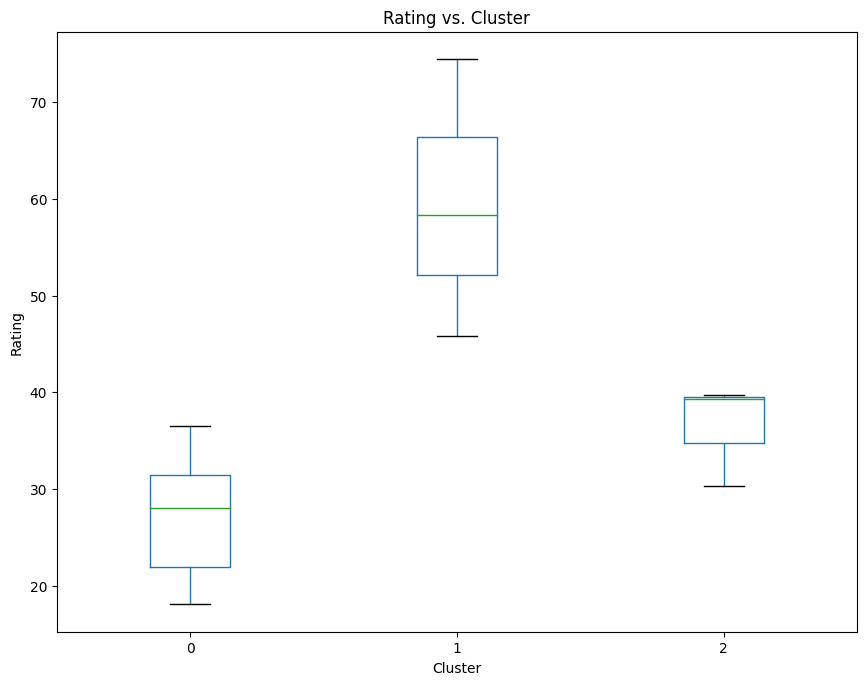

In [ ]:
# A cluster that achieves the highest rating:
plt.rcParams["figure.figsize"] = (10,8)

clusters3 = hierarchy.cut_tree(est, n_clusters = 3)
cereals['cluster'] = clusters3

cereals.boxplot(column = ['Rating'], by = ['cluster'])
plt.xlabel('Cluster')
plt.ylabel('Rating')
plt.title('Rating vs. Cluster')
plt.suptitle('')
plt.grid(False)

In [ ]:
# Which feature(s) of the cereal might contribute to the highest cereal rating?

# Defend your choices:

# It has low calories.


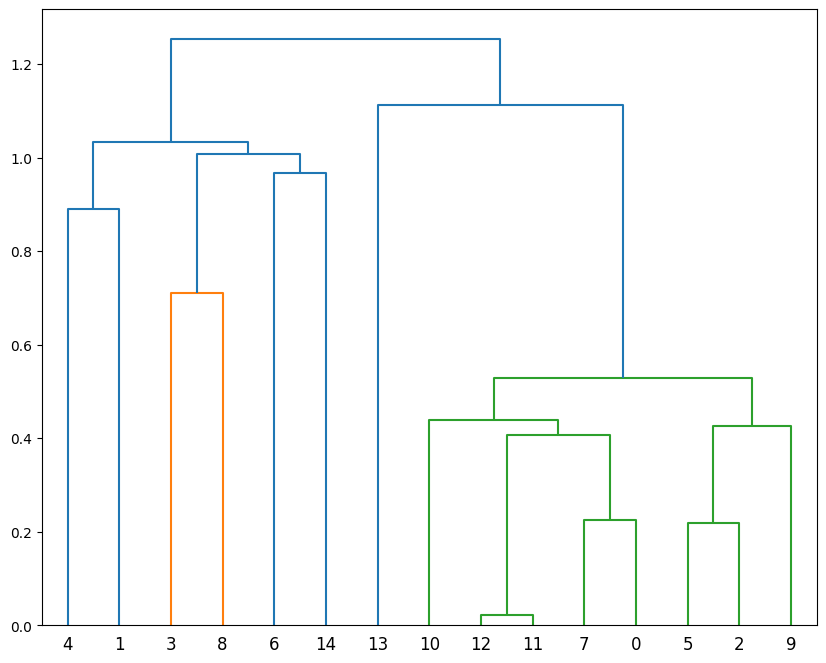

In [ ]:
# Model Specification II:
from scipy.cluster import hierarchy
est1 = hierarchy.linkage(distance_matrix, method = 'single', optimal_ordering = True)
dendrogram = hierarchy.dendrogram(est1)

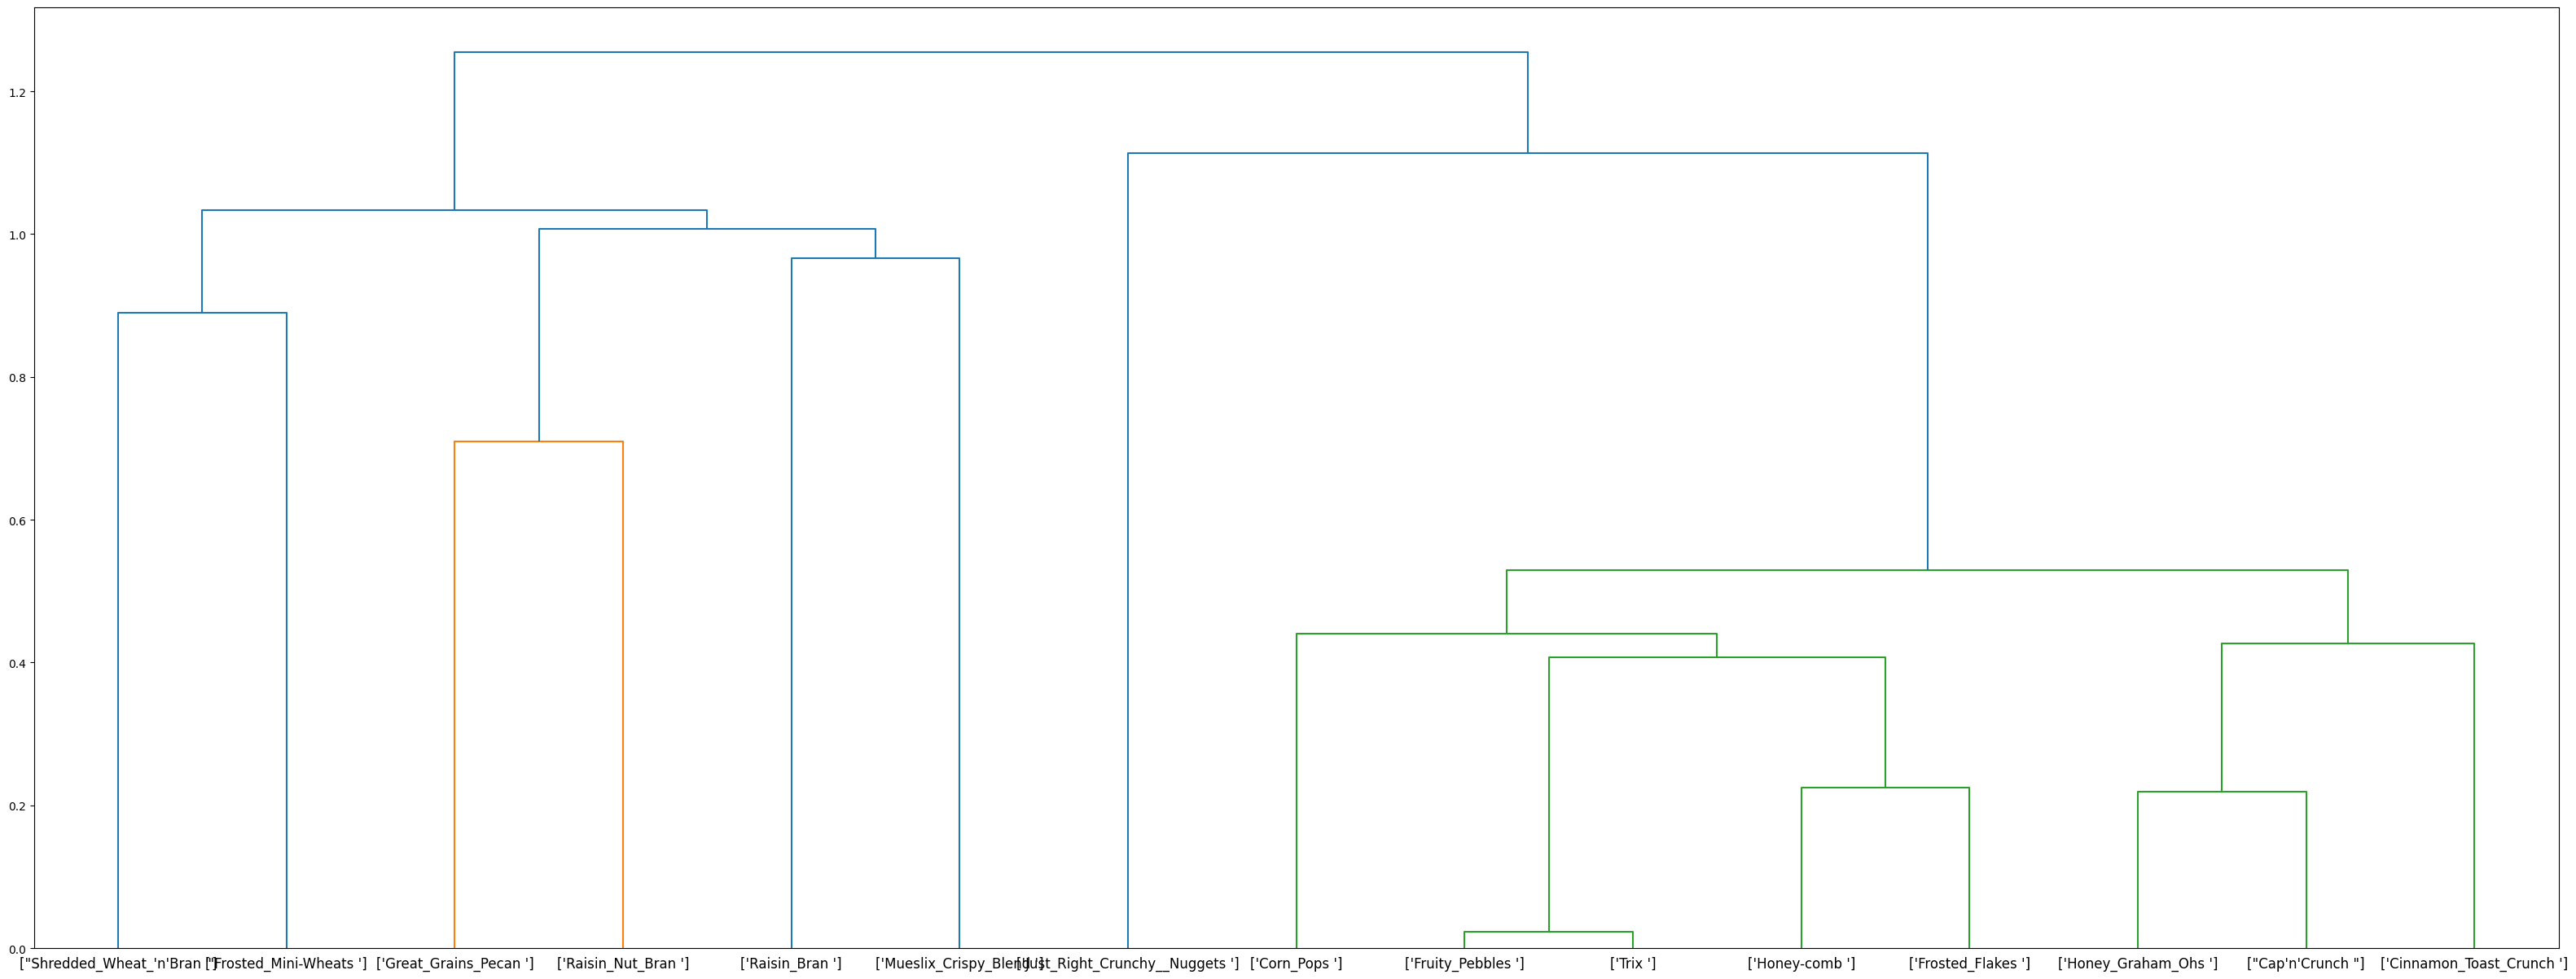

In [ ]:
# Model Estimation II:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,15)
labels_array = cereals[["Name"]].to_numpy()
dendrogram = hierarchy.dendrogram(est1, labels = labels_array)

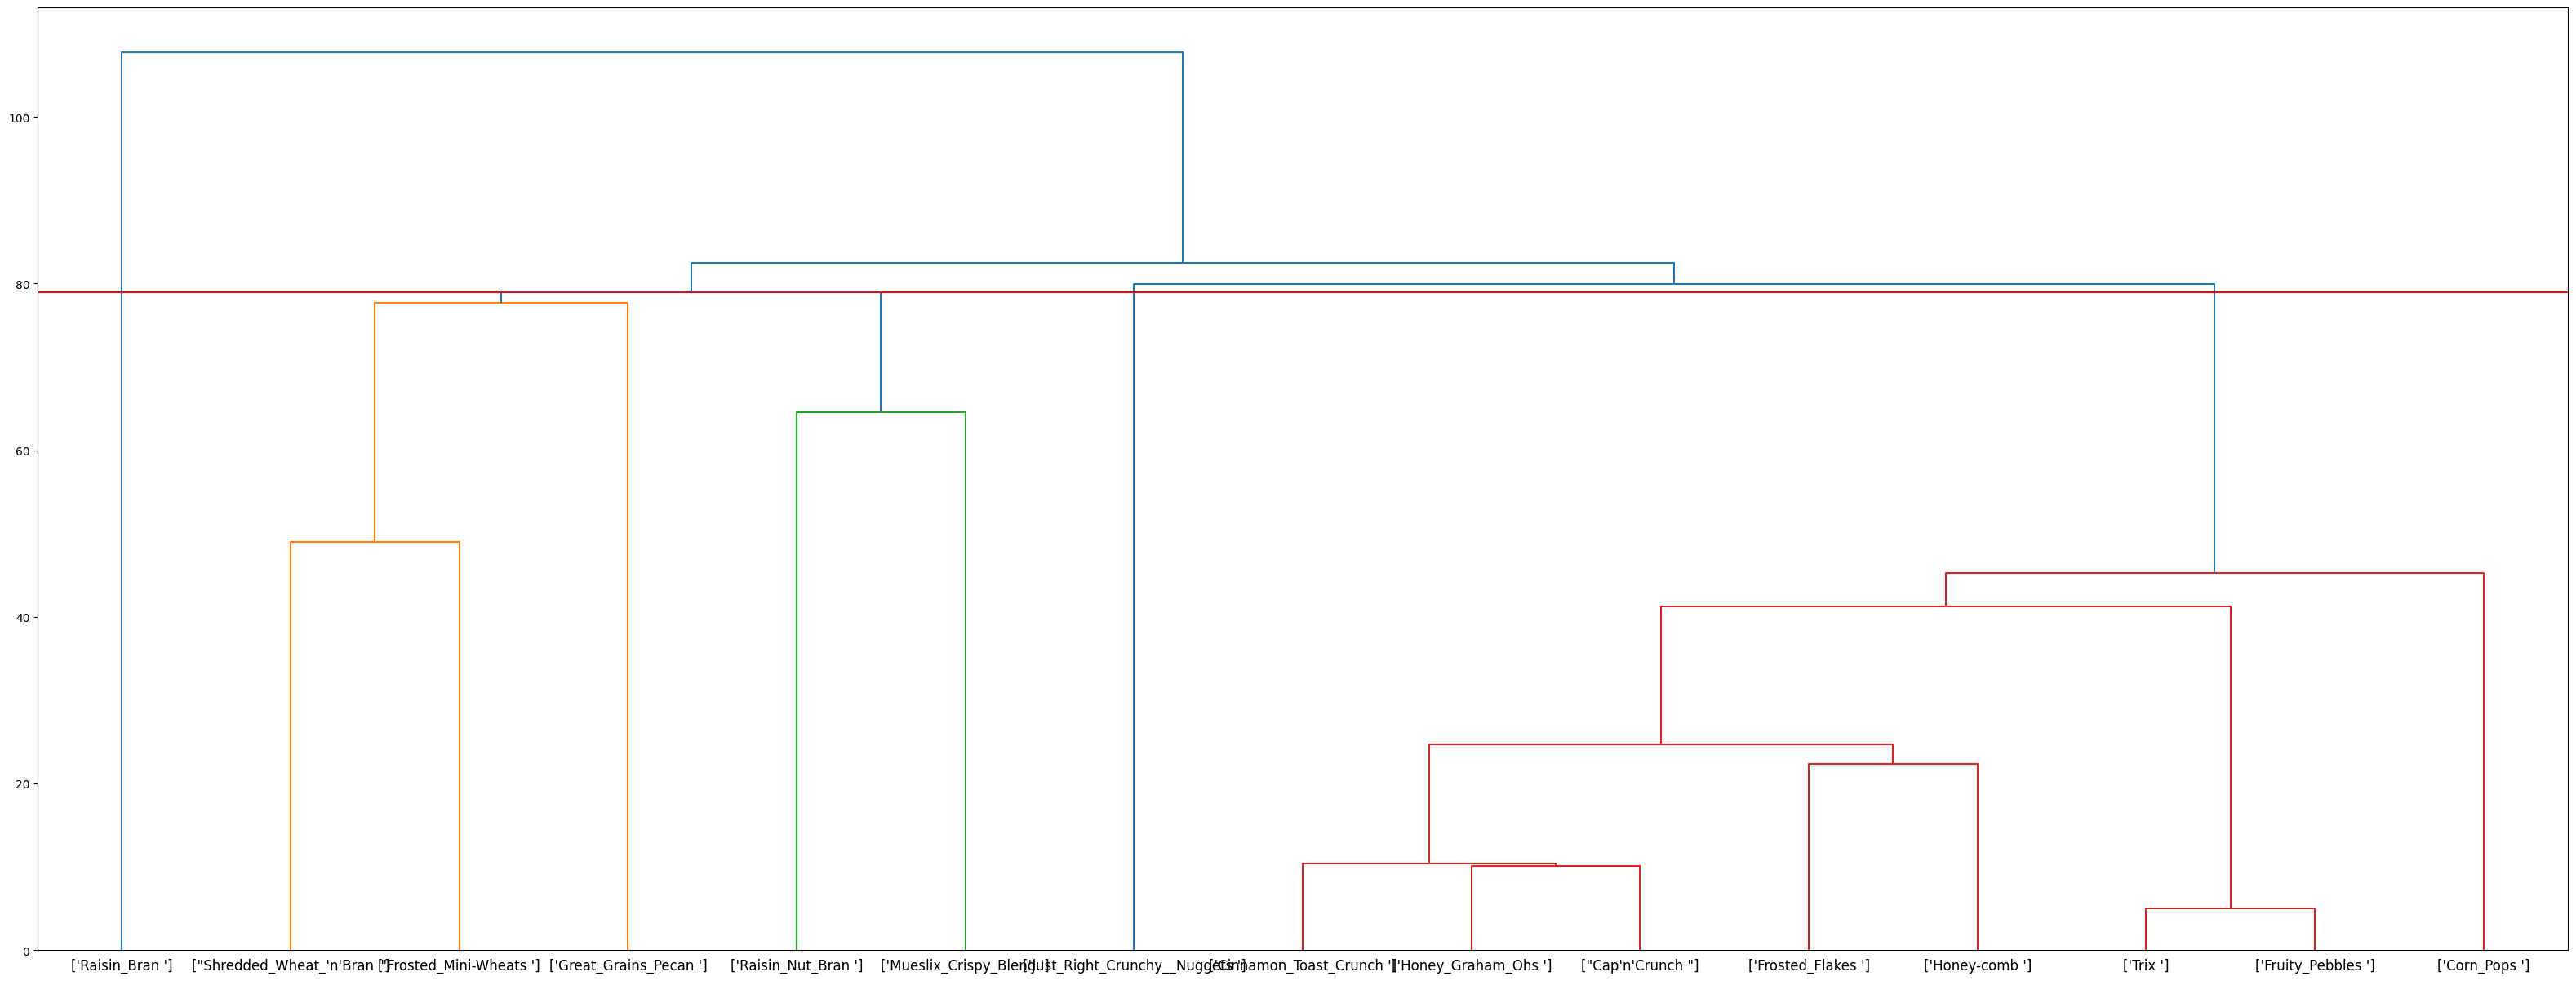

In [ ]:
# Model Estimation II:

dendrogram = hierarchy.dendrogram(est1, labels = labels_array, color_threshold = 79)
plt.axhline(y=79, color='r')


In [ ]:
# Observations in each Cluster:
cluster_labels = hierarchy.cut_tree(est1, height = 79)
cereals['cluster'] = cluster_labels


for i in range(max(cereals['cluster']+1)):
  cluster_info = cereals[(cereals['cluster'] == i)]
  print('Cluster ' + str(i) + ':')
  print(cluster_info['Name'])
  print()

Cluster 0:
25           Frosted_Flakes 
10             Cap'n'Crunch 
35         Honey_Graham_Ohs 
37               Honey-comb 
12    Cinnamon_Toast_Crunch 
17                Corn_Pops 
72                     Trix 
29           Fruity_Pebbles 
Name: Name, dtype: object

Cluster 1:
26       Frosted_Mini-Wheats 
34        Great_Grains_Pecan 
63    Shredded_Wheat_'n'Bran 
Name: Name, dtype: object

Cluster 2:
57    Raisin_Bran 
Name: Name, dtype: object

Cluster 3:
58         Raisin_Nut_Bran 
46    Mueslix_Crispy_Blend 
Name: Name, dtype: object

Cluster 4:
38    Just_Right_Crunchy__Nuggets 
Name: Name, dtype: object



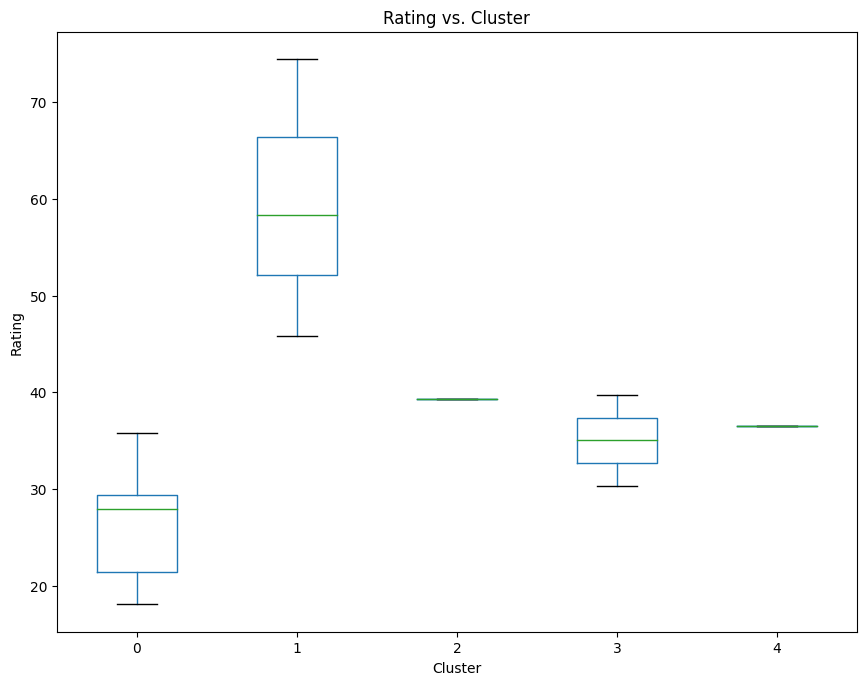

In [ ]:
# A cluster that achieves the highest rating:
plt.rcParams["figure.figsize"] = (10,8)

clusters3 = hierarchy.cut_tree(est1, n_clusters = 5)
cereals['cluster'] = clusters3

cereals.boxplot(column = ['Rating'], by = ['cluster'])
plt.xlabel('Cluster')
plt.ylabel('Rating')
plt.title('Rating vs. Cluster')
plt.suptitle('')
plt.grid(False)

In [ ]:
def min_max_scaling(series):
  return (series - series.min()) / (series.max() - series.min())
cereals['Calories_normalized'] = min_max_scaling(cereals['Calories'])
cereals['Protein_normalized'] = min_max_scaling(cereals['Protein'])
cereals['Fat_normalized'] = min_max_scaling(cereals['Fat'])
cereals['Sodium_normalized'] = min_max_scaling(cereals['Sodium'])
cereals['Fiber_normalized'] = min_max_scaling(cereals['Fiber'])
cereals['Carbo_normalized'] = min_max_scaling(cereals['Carbo'])
cereals['Sugars_normalized'] = min_max_scaling(cereals['Sugars'])
cereals['Potass_normalized'] = min_max_scaling(cereals['Potass'])
cereals['Vitamins_normalized'] = min_max_scaling(cereals['Vitamins'])

In [ ]:
from scipy.spatial.distance import pdist
ObservationData = cereals[['Calories_normalized', 'Protein_normalized', 'Fat_normalized', 'Sodium_normalized', 'Fiber_normalized', 'Carbo_normalized', 'Sugars_normalized', 'Potass_normalized', 'Vitamins_normalized']]
distance_matrix = pdist(ObservationData, 'euclidean')

In [ ]:
print(distance_matrix)
print(len(distance_matrix))

[1.48921053 0.75925204 1.70974835 1.91463308 0.73262873 1.65365188
 0.22434478 1.45783442 1.05273368 0.51987933 0.49522648 0.50809693
 1.1135585  1.64045333 1.7823195  1.1246986  0.88990314 1.70253193
 1.34788296 1.49392021 1.03340617 1.85817091 1.28131369 1.47460733
 1.4649429  1.36552891 1.4338688  1.54445601 2.25581002 0.21905085
 1.74264904 0.74779071 1.34813565 0.42701125 0.93408552 0.52882665
 0.54470458 1.26792109 1.56924784 1.42421725 1.43937264 1.33360105
 1.73184077 0.71012305 1.39534174 1.64194597 1.55147131 1.54730411
 1.37912992 1.15281574 2.15203668 1.64716269 1.93477143 1.54951912
 2.22741044 1.82190823 1.98085516 1.97367121 1.6734586  1.7536956
 1.612482   0.77158272 1.25488139 0.43667688 0.9201616  0.57599751
 0.59060866 1.22240365 1.49355398 1.73905624 1.00738262 1.81581392
 1.75581342 1.7579962  1.7622514  1.58523586 0.96681846 1.48273542
 1.03854648 0.48141679 0.40742247 0.41805988 1.11851997 1.67460749
 1.35013804 1.44402421 1.35496968 1.35516027 1.33913758 1.21972

In [ ]:
max(distance_matrix)

2.2558100248002333

In [ ]:
min(distance_matrix)

0.022727272727272707

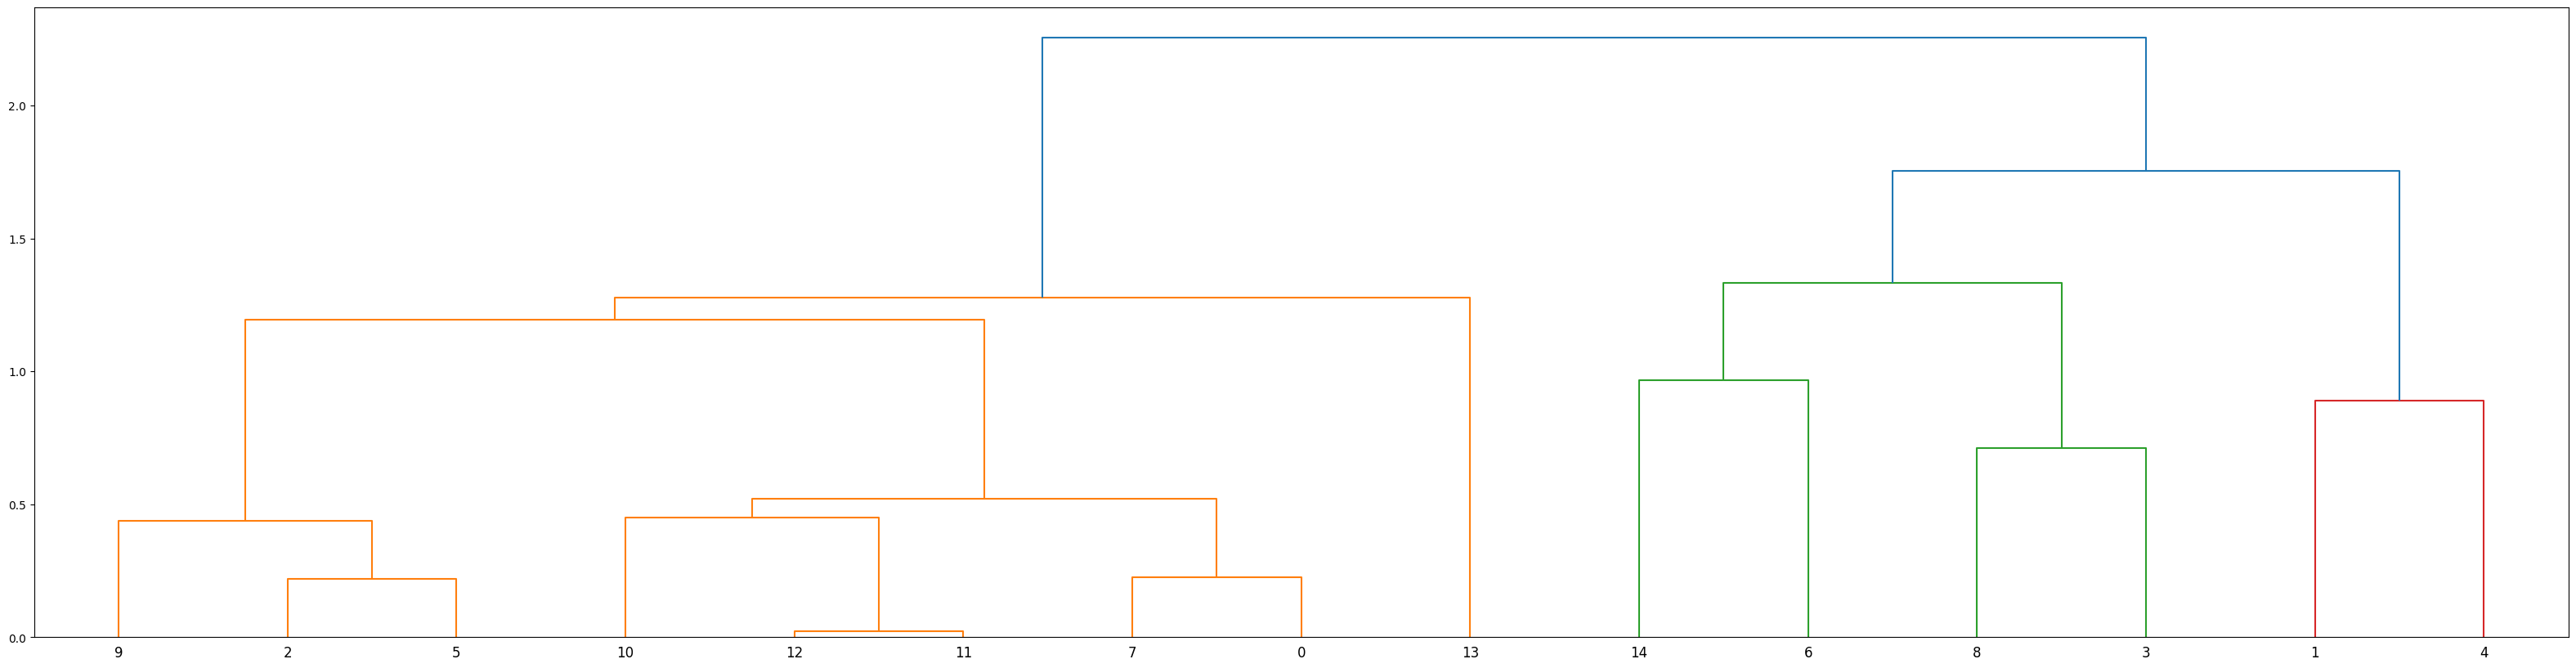

In [ ]:
# Model Specification:
from scipy.cluster import hierarchy
est3 = hierarchy.linkage(distance_matrix, method = 'complete', optimal_ordering = True)
dendrogram = hierarchy.dendrogram(est3)

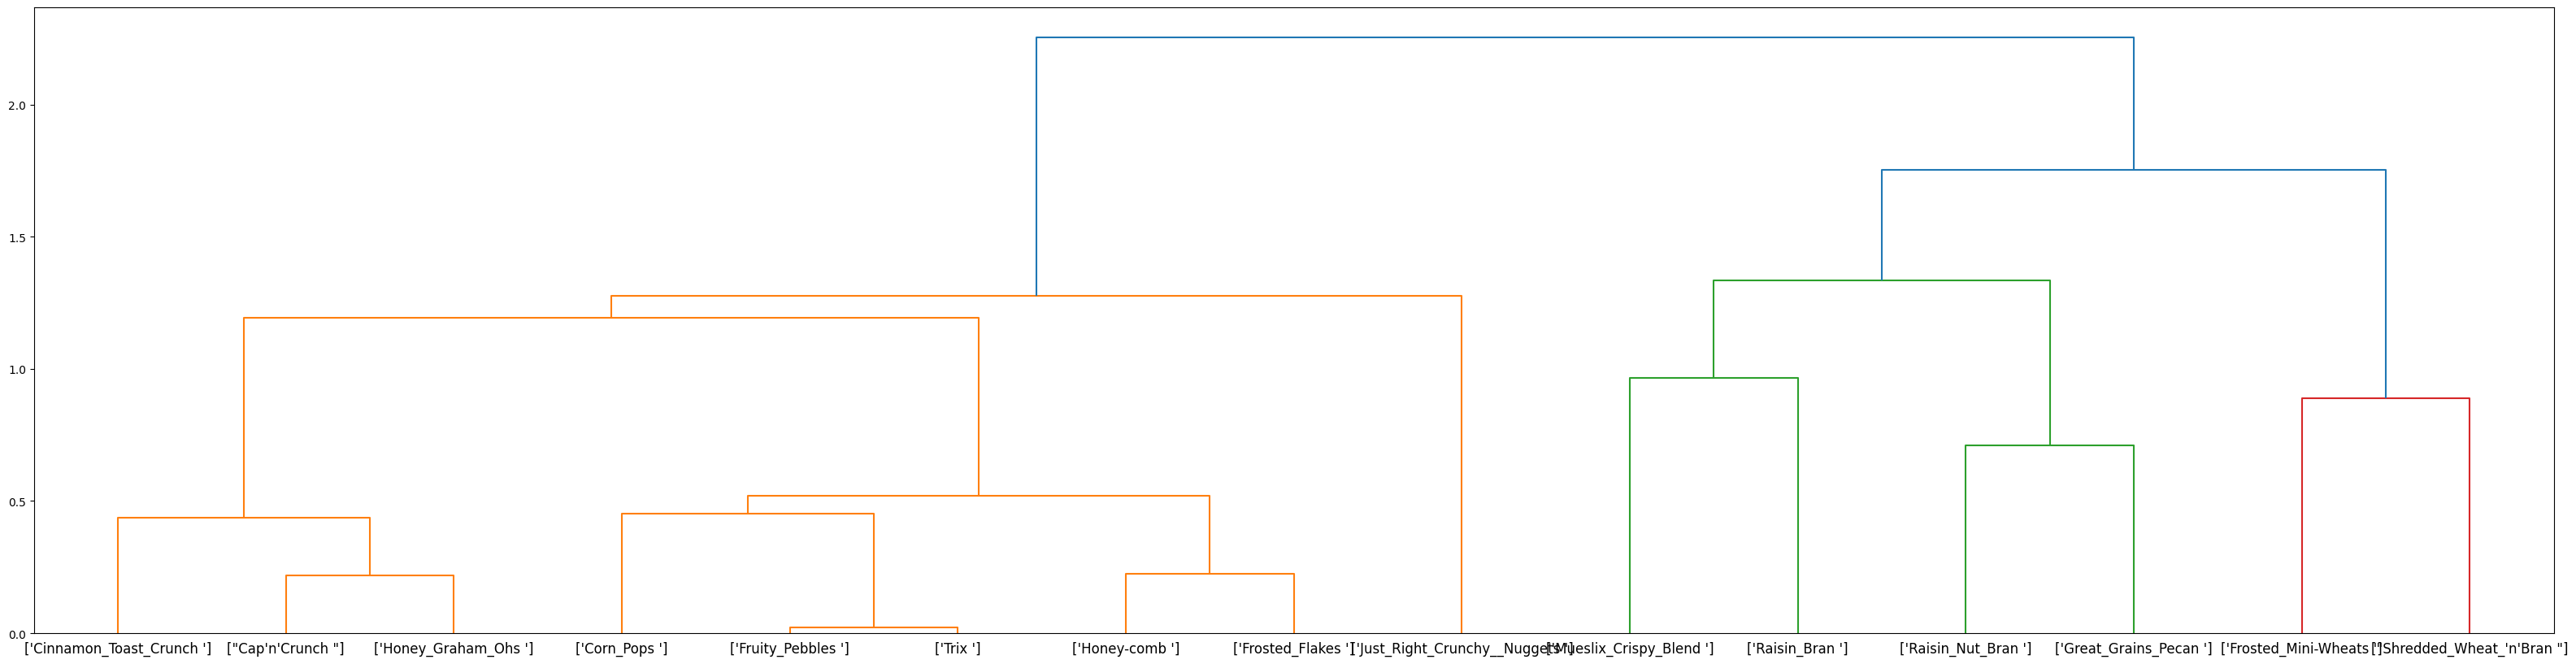

In [ ]:
# Model Estimation II:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,10)
labels_array = cereals[["Name"]].to_numpy()
dendrogram = hierarchy.dendrogram(est3, labels = labels_array)

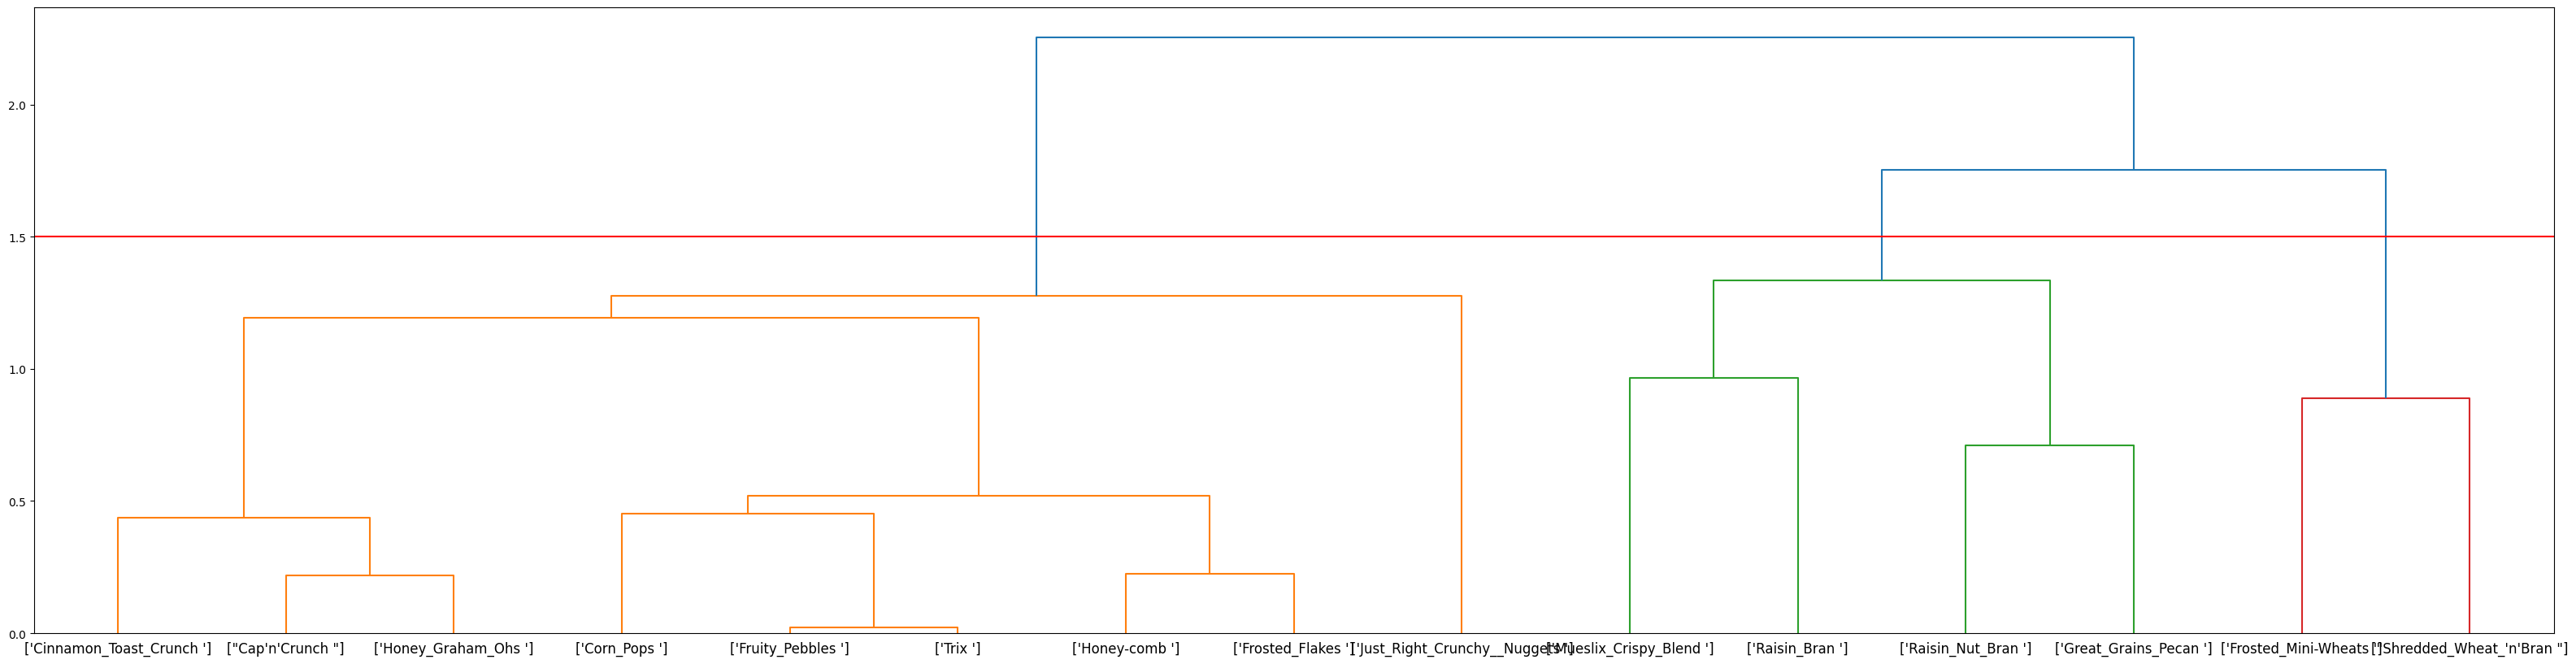

In [ ]:
# Model Estimation I:

dendrogram = hierarchy.dendrogram(est3, labels = labels_array, color_threshold = 1.5)
plt.axhline(y=1.5, color='r')

In [ ]:
# Observations in Each Cluster:
cluster_labels = hierarchy.cut_tree(est3, height = 1.5)
cereals['cluster'] = cluster_labels


for i in range(max(cereals['cluster']+1)):
  cluster_info = cereals[(cereals['cluster'] == i)]
  print('Cluster ' + str(i) + ':')
  print(cluster_info['Name'])
  print()

Cluster 0:
25                 Frosted_Flakes 
10                   Cap'n'Crunch 
35               Honey_Graham_Ohs 
37                     Honey-comb 
12          Cinnamon_Toast_Crunch 
17                      Corn_Pops 
72                           Trix 
29                 Fruity_Pebbles 
38    Just_Right_Crunchy__Nuggets 
Name: Name, dtype: object

Cluster 1:
26       Frosted_Mini-Wheats 
63    Shredded_Wheat_'n'Bran 
Name: Name, dtype: object

Cluster 2:
34      Great_Grains_Pecan 
57             Raisin_Bran 
58         Raisin_Nut_Bran 
46    Mueslix_Crispy_Blend 
Name: Name, dtype: object



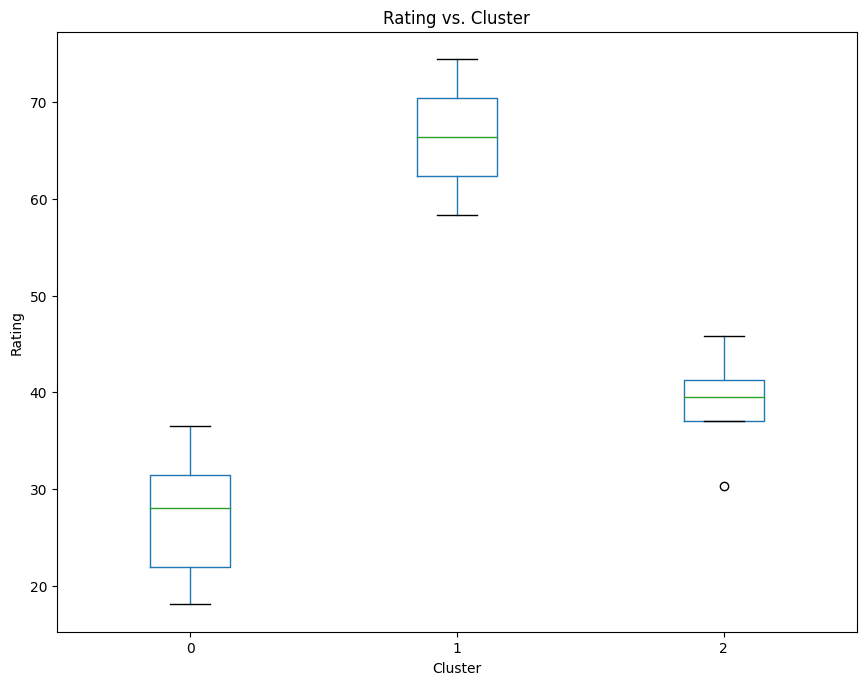

In [ ]:
# A cluster that achieves the highest rating:
plt.rcParams["figure.figsize"] = (10,8)

clusters3 = hierarchy.cut_tree(est3, n_clusters = 3)
cereals['cluster'] = clusters3

cereals.boxplot(column = ['Rating'], by = ['cluster'])
plt.xlabel('Cluster')
plt.ylabel('Rating')
plt.title('Rating vs. Cluster')
plt.suptitle('')
plt.grid(False)